# This notebook is meant to create functions for plotting 

Goal is then to add them to the classes or as checks that everything is well

In [1]:
%load_ext autoreload
%matplotlib inline

In [2]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt


print(os.getcwd())

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/intro.yaml'

/home/mcarenso/code/tempest


In [3]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, verbose = True)
gr = grid.Grid(hdlr, verbose = False, overwrite = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass

Data loaded from input/intro/DYAMOND_SAM_ITCZ_intro/var_id_days_i_t.json
Precac
day:      (#t)  t_i-t_f
16-08-31: (48) 1440-1487
16-09-01: (1) 1488-1488
U10m
day:      (#t)  t_i-t_f
16-08-31: (48) 1440-1487
16-09-01: (1) 1488-1488
V10m
day:      (#t)  t_i-t_f
16-08-31: (48) 1440-1487
16-09-01: (1) 1488-1488
Prec
day:      (#t)  t_i-t_f
16-08-31: (47) 1441-1487
16-09-01: (1) 1488-1488
MCS_label
day:      (#t)  t_i-t_f
16-08-01: (45) 2-46
16-08-02: (48) 47-94
16-08-03: (48) 95-142
16-08-04: (48) 143-190
16-08-05: (48) 191-238
16-08-06: (48) 239-286
16-08-07: (48) 287-334
16-08-08: (48) 335-382
16-08-09: (48) 383-430
16-08-10: (48) 431-478
16-08-11: (48) 479-526
16-08-12: (48) 527-574
16-08-13: (48) 575-622
16-08-14: (48) 623-670
16-08-15: (48) 671-718
16-08-16: (48) 719-766
16-08-17: (48) 767-814
16-08-18: (48) 815-862
16-08-19: (48) 863-910
16-08-20: (48) 911-958
16-08-21: (48) 959-1006
16-08-22: (48) 1007-1054
16-08-23: (48) 1055-1102
16-08-24: (48) 1103-1150
16-08-25: (48) 1151-1198
1

In [4]:
jd = joint_distrib.JointDistribution(gr, nd=3)

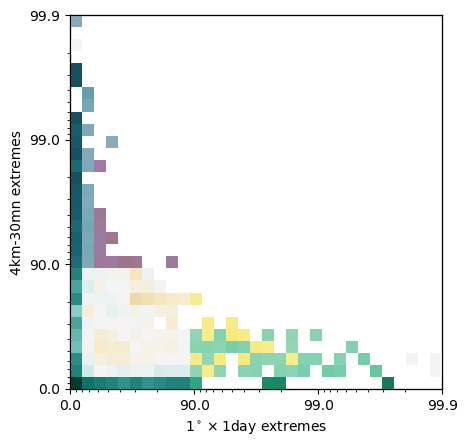

In [5]:
jd.plot(branch=False)

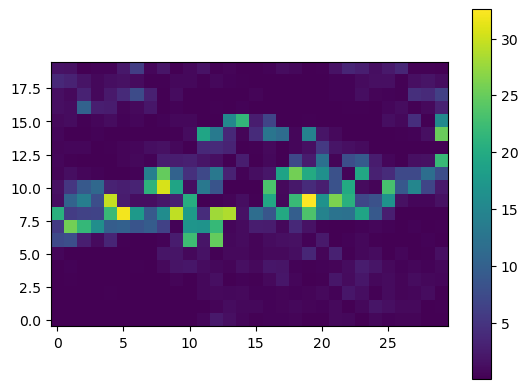

In [6]:
plt.imshow(jd.prec['max_Prec'][:,:,0], origin = 'lower')
plt.colorbar()
## Bon on a un souci de signe avec mean_Prec... 

In [7]:
jd.get_mask_yxt_from_mask_jdist(jd.mask_branch1_90).shape

(20, 30, 2)

In [ ]:
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    ax.set_title(mask_name)
    
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')

In [10]:
self = hdlr

self.rel_table.loc[self.rel_table['path_dyamond'] == 'DYAMOND_9216x4608x74_7.5s_4km_4608_0000000480', 'img_seg_path']

Series([], Name: img_seg_path, dtype: object)

In [12]:
self.rel_table['path_dyamond'] == 'DYAMOND_9216x4608x74_7.5s_4km_4608_0000000480'

0       DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720
1       DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960
2       DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200
3       DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440
4       DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680
                            ...                      
1913    DYAMOND_9216x4608x74_7.5s_4km_4608_0000459840
1914    DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080
1915    DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320
1916    DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560
1917    DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800
Name: path_dyamond, Length: 1918, dtype: object